<a href="https://colab.research.google.com/github/VKleinSousa/RBPseg/blob/main/RBPseg_sdp_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 💽 Instalation

In [1]:
# @title
!pip install -q condacolab
import condacolab
condacolab.install()

!conda install -c conda-forge -c bioconda foldseek pdbfixer openmm usalign -y

!pip install git+https://github.com/VKleinSousa/RBPseg.git@rbpseg-1.1.1-test


✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
 - bioconda
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

  Cloning https://github.com/VKleinSousa/RBPseg.git (to revision rbpseg-1.1.1-test) to /tmp/pip-req-build-iu7h2e7j
  Running command git clone --filter=blob:none --quiet https://github.com/VKleinSousa/RBPseg.git /tmp/pip-req-build-iu7h2e7j
  Running command git checkout -b rbpseg-1.1.1-test --track origin/rbpseg-1.1.1-test
  Switched to a new branch 'rbpseg-1.1.1-test'
  Branch 'rbpseg-1.1.1-test' set up to track remote branch 'rbpseg-1.1.1-test' from 'origin'.
  Resolved https://github.com/VKleinSousa/RBPseg.git to commit 282984c59c237c99fcd1abe16d431e8357535320
  Preparing metadata (setup.py) ... done


In [2]:
# @title

import os
os.environ['MPLBACKEND'] = 'Agg'
!rbpseg-sdp -h

usage: rbpseg-sdp [-h] -p PDB [-c CLUSTERING_METHOD] [-k MAX_K] [-mk MIN_K]
                  [-s MIN_DOMAIN_SIZE] [-ovs MIN_OV_SIZE]
                  [-pd PAIR_DISTANCE_CONSTANT] [-n NUMBER_OF_CHAINS] [-e]
                  [-so] [-sv] [-u] [-o] [-np]

___________________________________________
            RBPseg-sdp v0.1.3
___________________________________________
Segment PDB files based on the sDp analysis. 

options:
  -h, --help            show this help message and exit
  -p PDB, --pdb PDB     PDB file
  -c CLUSTERING_METHOD, --clustering_method CLUSTERING_METHOD
                        Clustering Method. Options: kmeans, hdbscan. Default:
                        HDBSCAN
  -k MAX_K, --max_k MAX_K
                        Maximum number of possible kmean clusters. Used only
                        -c is spectral or kmeans. Optimal value will depend on
                        the size of the fiber. Default: 20
  -mk MIN_K, --min_k MIN_K
                        Minimum number of 

In [11]:
# @title RBPseg-sdp: Segment Your PDB Structure

from IPython.display import display, Markdown
import ipywidgets as widgets
import os

# ---------------------- Widgets ----------------------

monomer_predictions_widget = widgets.FileUpload(multiple=False)

clustering_widget = widgets.Dropdown(
    options=['hdbscan', 'kmeans', 'spectral'],
    value='hdbscan',
    description='Clustering:'
)

max_k_widget = widgets.IntText(value=20, description='Max k:')
min_k_widget = widgets.IntText(value=3, description='Min k:')
min_domain_widget = widgets.IntText(value=120, description='Min domain size:')
min_overlap_widget = widgets.IntText(value=50, description='Min overlap size:')
pair_distance_widget = widgets.FloatText(value=1.0, description='Pair dist. const:')
num_chains_widget = widgets.IntText(value=3, description='# Chains:')

exp_structure_widget = widgets.Checkbox(value=False, description='Experimental structure (-e)')
save_overlap_widget = widgets.Checkbox(value=True, description='Save overlap domains (-so)')
optimize_umap_widget = widgets.Checkbox(value=False, description='Optimize UMAP (-u)')
single_chain_widget = widgets.Checkbox(value=False, description='Only single chain (-o)')
normalize_plddt_widget = widgets.Checkbox(value=False, description='Normalize pLDDT (-np)')

submit_button = widgets.Button(description='Run rbpseg-sdp', button_style='success')

# ---------------------- Handler ----------------------

def run_rbpseg_sdp(b):
    if not monomer_predictions_widget.value:
        print("❌ Please upload a .pdb file first.")
        return

    # Save uploaded file
    upload = list(monomer_predictions_widget.value.items())[0]
    filename, filedata = upload
    local_path = os.path.join("/content", filename)
    with open(local_path, "wb") as f:
        f.write(filedata['content'])

    # Build CLI command
    cmd = f"rbpseg-sdp -p {local_path} -c {clustering_widget.value} -k {max_k_widget.value} -mk {min_k_widget.value} " \
          f"-s {min_domain_widget.value} -ovs {min_overlap_widget.value} -pd {pair_distance_widget.value} " \
          f"-n {num_chains_widget.value}"

    # Add flags
    if exp_structure_widget.value: cmd += " -e"
    if save_overlap_widget.value: cmd += " -so"
    if optimize_umap_widget.value: cmd += " -u"
    if single_chain_widget.value: cmd += " -o"
    if normalize_plddt_widget.value: cmd += " -np"

    print("🧪 Running command:")
    print(cmd)

    os.system(cmd)

submit_button.on_click(run_rbpseg_sdp)

# ---------------------- Display ----------------------

display(Markdown("## 🧬 Segment your PDB structure with RBPseg-sdp"))

display(Markdown("**Upload monomer `.pdb` file:**"))
display(monomer_predictions_widget)

display(clustering_widget)
display(max_k_widget, min_k_widget)
display(min_domain_widget, min_overlap_widget)
display(pair_distance_widget, num_chains_widget)

display(exp_structure_widget)
display(save_overlap_widget)
display(single_chain_widget)
display(normalize_plddt_widget)

display(submit_button)


## 🧬 Segment your PDB structure with RBPseg-sdp

**Upload monomer `.pdb` file:**

FileUpload(value={}, description='Upload')

Dropdown(description='Clustering:', options=('hdbscan', 'kmeans', 'spectral'), value='hdbscan')

IntText(value=20, description='Max k:')

IntText(value=3, description='Min k:')

IntText(value=120, description='Min domain size:')

IntText(value=50, description='Min overlap size:')

FloatText(value=1.0, description='Pair dist. const:')

IntText(value=3, description='# Chains:')

Checkbox(value=False, description='Experimental structure (-e)')

Checkbox(value=True, description='Save overlap domains (-so)')

Checkbox(value=False, description='Only single chain (-o)')

Checkbox(value=False, description='Normalize pLDDT (-np)')

Button(button_style='success', description='Run rbpseg-sdp', style=ButtonStyle())

🧪 Running command:
rbpseg-sdp -p /content/rbp_11.pdb -c spectral -k 20 -mk 3 -s 120 -ovs 50 -pd 1.0 -n 3 -so -o
🧪 Running command:
rbpseg-sdp -p /content/rbp_11.pdb -c spectral -k 20 -mk 3 -s 120 -ovs 50 -pd 1.0 -n 3 -o


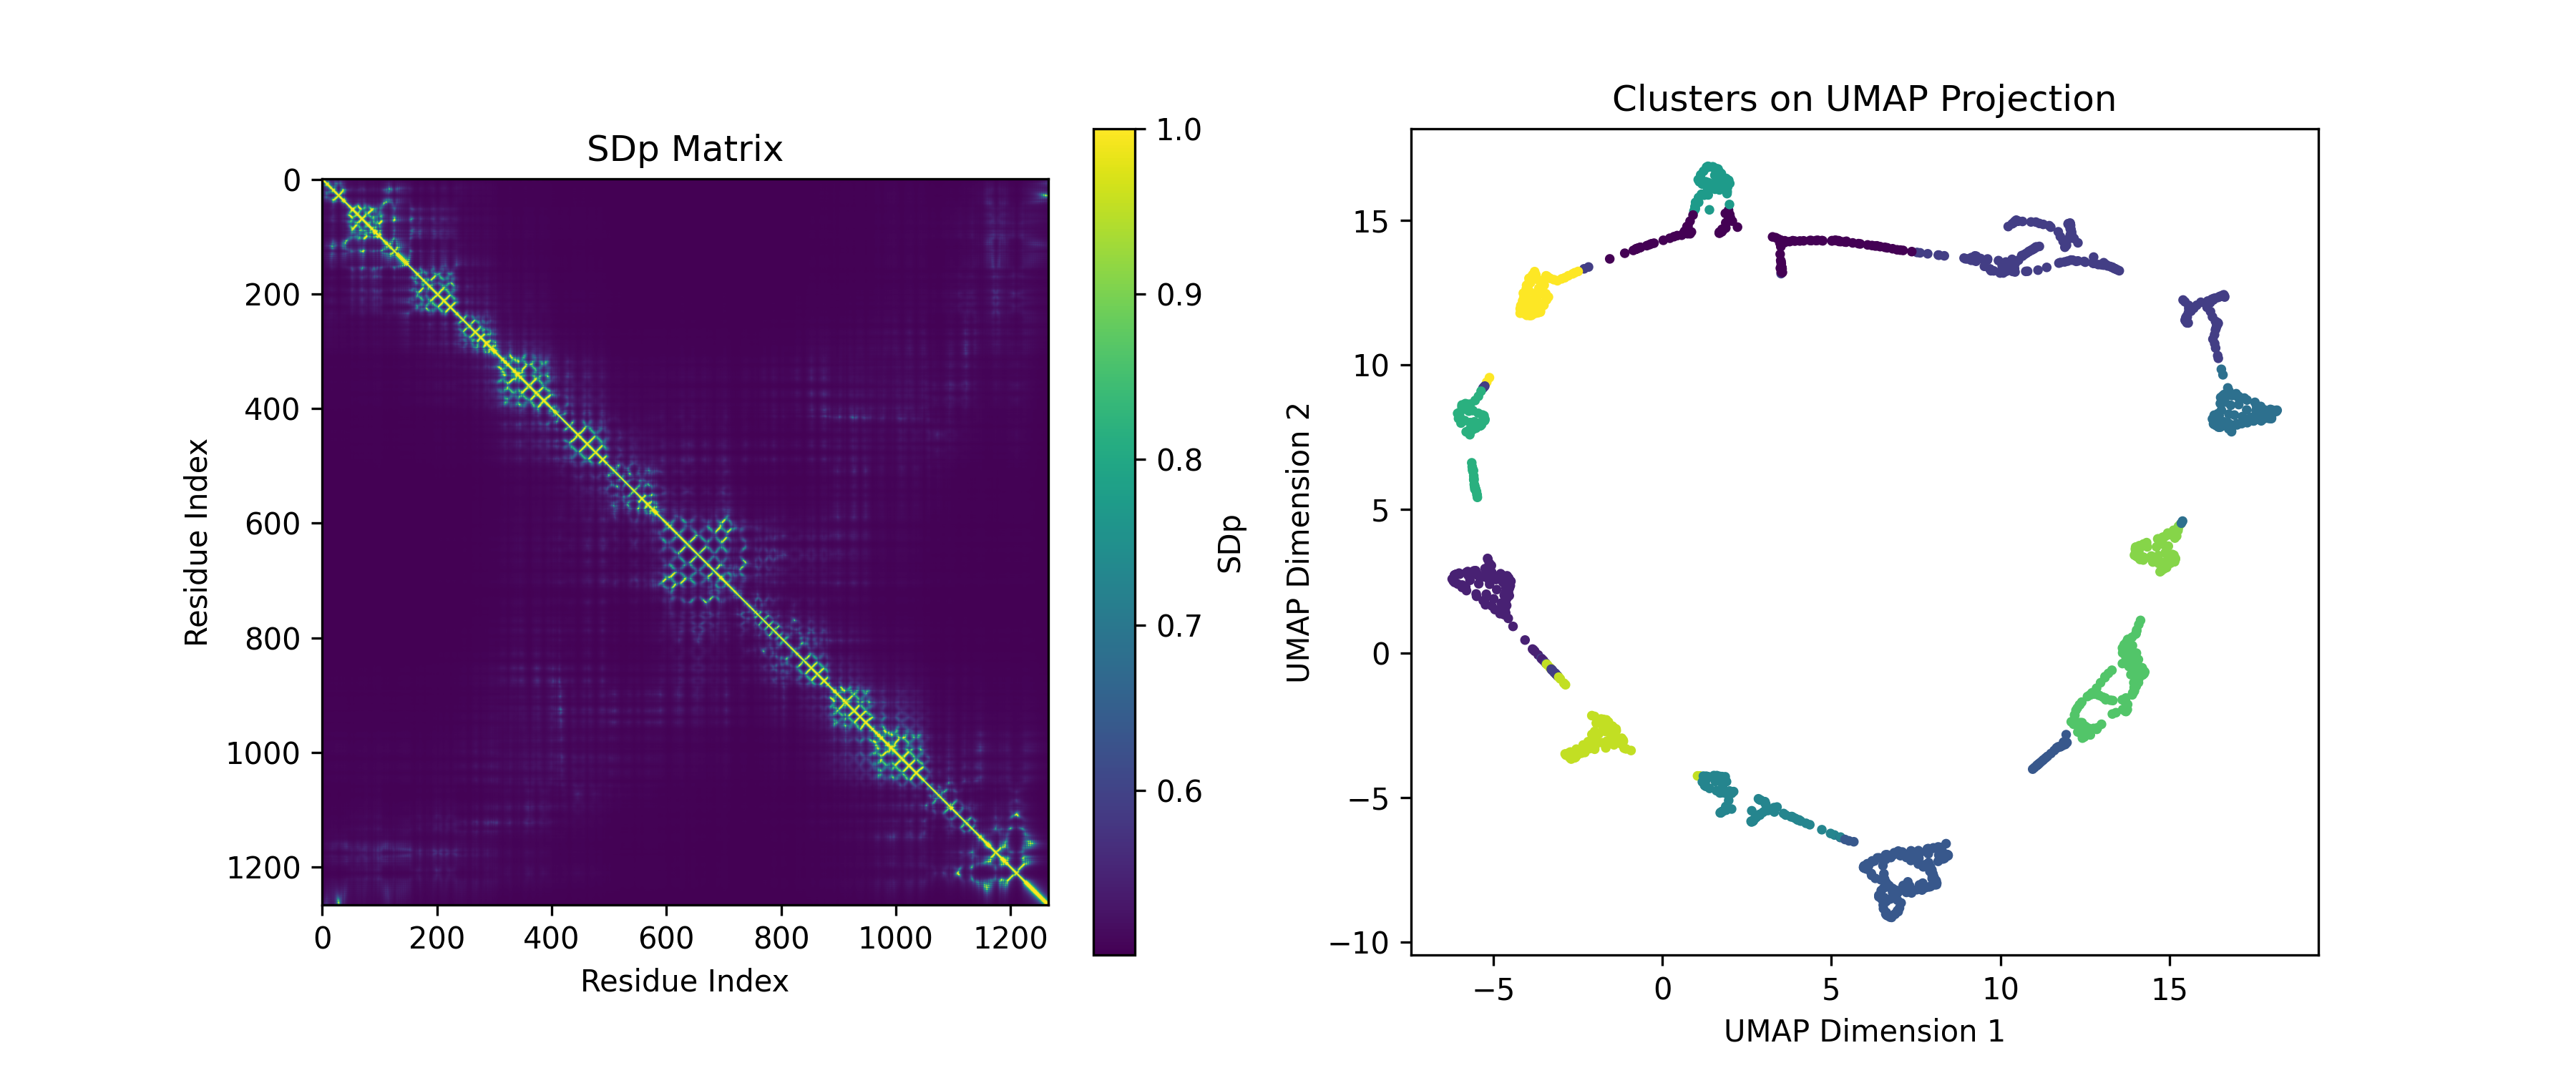

In [13]:
from IPython.display import Image, display

try:
  display(Image('rbp_11_combined_plots.png'))
except FileNotFoundError:
  print("Error: plot.png not found. Please ensure the rbpseg-sdp command ran successfully and generated the plot file.")